![HACKTIV8](datasets/H8.jpeg)

---
# Capstone Project 3

Nama Anggota:
  1. Oktaviani (PYTN-KS16-002)
  2. Gladis Hafifah (PYTN-KS16-001)
  3. Muhammad Rayhan Assegaf (PYTN-KS16-022)
---

## Introduction


Gagal jantung adalah kondisi di mana jantung tidak mampu memompa darah dengan cukup untuk memenuhi kebutuhan tubuh. Penyebab gagal jantung antara lain penyakit jantung koroner, hipertensi, diabetes, kelainan atau kerusakan otot jantung, radang otot jantung, penyakit katup jantung, gangguan irama jantung, dan penyakit jantung bawaan.

Gagal jantung dapat dibagi menjadi dua, meliputi penyakit pada miokard (antara lain: penyakit jantung koroner, kardiomiopati, miokarditis), dan gangguan mekanis pada miokard (antara lain: hipertensi, stenosis aorta, koartasio aorta).

Gagal jantung dapat menyerang siapa saja namun gagal jantung sering terjadi pada orang yang usia rentan sekitar 65 tahun keatas. Faktor risiko yang menyebabkan seseorang mengalami gagal jantung antara lain merokok, obesitas, kurang berolahraga, memiliki tekanan darah tinggi, memiliki kadar kolesterol tinggi, dan memiliki riwayat keluarga yang menderita gagal jantung.

Heart failure clinical recode adalah datasets yang akan kita gunakan untuk mengclassificasi dengan menggunakan model ensemble, data tersebut berisi kumpulan recode para pasien pengidap gagal jantung yang mencangkup data usia, riwayat penyakit lainnya yang diderita, kadar serum, kinerja jantung dan waktu follow up. Datasets ini kami dapatkan dari platform kaggle yang terdiri dari 299 entries dan 13 attributes.

This dataset contains:
- age: Usia pada pasien gagal jantung.
- anaemia: Mengidentifikasi apakah pasien mempunyai riwayat kurangnya hemoglobin dalam darah.
- creatinine_phosphokinase (CPK): Tingkat enzim CPK dalam mikrogram per liter (mcg/L) darah.
- diabetes: Mengidentifikasi apakah pasien mempunyai riwayat diabetes.
- enjection_fraction: Persentase darah yang meninggalkan jantung pada setiap kontraksi, memberikan gambaran tentang kinerja Jantung.
- high_blood_pressure: Mengidentifikasi apakah pasien mempunyai riwayat tekanan darah tinggi.
- platelets: Jumlah platelet dalam darah, diukur dalam kiloplatelet per mililiter (kiloplatelets/mL).
- serum_creatinine: Tingkat kreatinin serum dalam darah, diukur dalam miligram per desiliter (mg/dL).
- serum_sodium: Tingkat natrium serum dalam darah, diukur dalam miliequivalents per liter (mEq/L).
- sex: Mengidentifikasi apakah pasien adalah pria atau wanita.
- smoking: Mengidentifikasi apakah pasien merokok.
- time: Waktu dalam hari untuk follow-up.
- DEATH_EVENT: Menunjukkan apakah pasien sudah meninggal pada waktu follow-up.

### Objective
1. Mampu memiliki pemahaman terhadap konsep klasifikasi dengan menggunakan model ensemble
2. Mampu menyiapkan data agar dapat digunakan secara efektif dalam konteks model ensemble.
3. Mampu melakukan implementasi model ensembel untuk melakukan prediksi.


---
---

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')

### Data Splitting

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (239, 13)
Test set size: (60, 13)


### Explore Data Training

In [ ]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162,1
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112,0
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27,1


In [ ]:
train.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71,0
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
102,80.000,0,898,0,25,0,149000.00,1.1,144,1,1,87,0


Keterangan:
* Anaemia: 1 = Yes, 0 = No
* Diabetes: 1 = Yes, 0 = No
* High Blood: 1 = Yes, 0 = No
* Sex: 1 = Pria, 0 = Wanita
* Smoking: 1 = Yes, 0 = No
* Death Event: 1 = Yes, 0 = No

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 6 to 102
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
 12  DEATH_EVENT               239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 26.1 KB


In [ ]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
train.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    175
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   153
serum_creatinine             38
serum_sodium                 26
sex                           2
smoking                       2
time                        132
DEATH_EVENT                   2
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,239.0,61.059975,11.999013,40.0,52.0,60.0,69.5,95.0
anaemia,239.0,0.435146,0.496817,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,239.0,577.083682,946.937475,23.0,111.5,245.0,582.0,7861.0
diabetes,239.0,0.405858,0.492088,0.0,0.0,0.0,1.0,1.0
ejection_fraction,239.0,38.263598,11.651161,15.0,30.0,38.0,45.0,80.0
high_blood_pressure,239.0,0.351464,0.478430,0.0,0.0,0.0,1.0,1.0
platelets,239.0,262427.450209,94272.495618,47000.0,212500.0,263000.0,303500.0,742000.0
serum_creatinine,239.0,1.387364,0.994975,0.5,0.9,1.1,1.4,9.0
serum_sodium,239.0,136.418410,4.440152,113.0,134.0,137.0,139.0,146.0
sex,239.0,0.644351,0.479714,0.0,0.0,1.0,1.0,1.0


In [ ]:
train.shape

(239, 13)


---
## Data Cleaning

### Checking Missing Value

In [ ]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Checking Data Duplicated

In [ ]:
train.duplicated().any()

False

---
## Eksplorary Data Analysis (EDA)

In [ ]:
#Membuat objek groupby untuk kolom ChestPainType
by_cpt = train.groupby('sex')

#Rata-rata dari setiap chest pain
by_cpt.mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
sex,,,,,,,,,,,,
0,60.043141,0.494118,500.388235,0.517647,40.129412,0.388235,281637.037412,1.442588,136.776471,0.035294,132.176471,0.329412
1,61.621214,0.402597,619.415584,0.344156,37.233766,0.331169,251824.755974,1.356883,136.220779,0.467532,132.363636,0.279221


In [ ]:
#Membuat objek groupby untuk kolom RestingECG
by_recg = train.groupby('DEATH_EVENT')

#Rata-rata dari setiap resting ecg
by_recg.mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.807542,0.416667,555.416667,0.404762,40.208333,0.333333,266013.668810,1.176607,136.964286,0.660714,0.327381,159.714286
1,66.389676,0.478873,628.352113,0.408451,33.661972,0.394366,253941.749859,1.886056,135.126761,0.605634,0.281690,67.422535


### Checking Distribusi Data

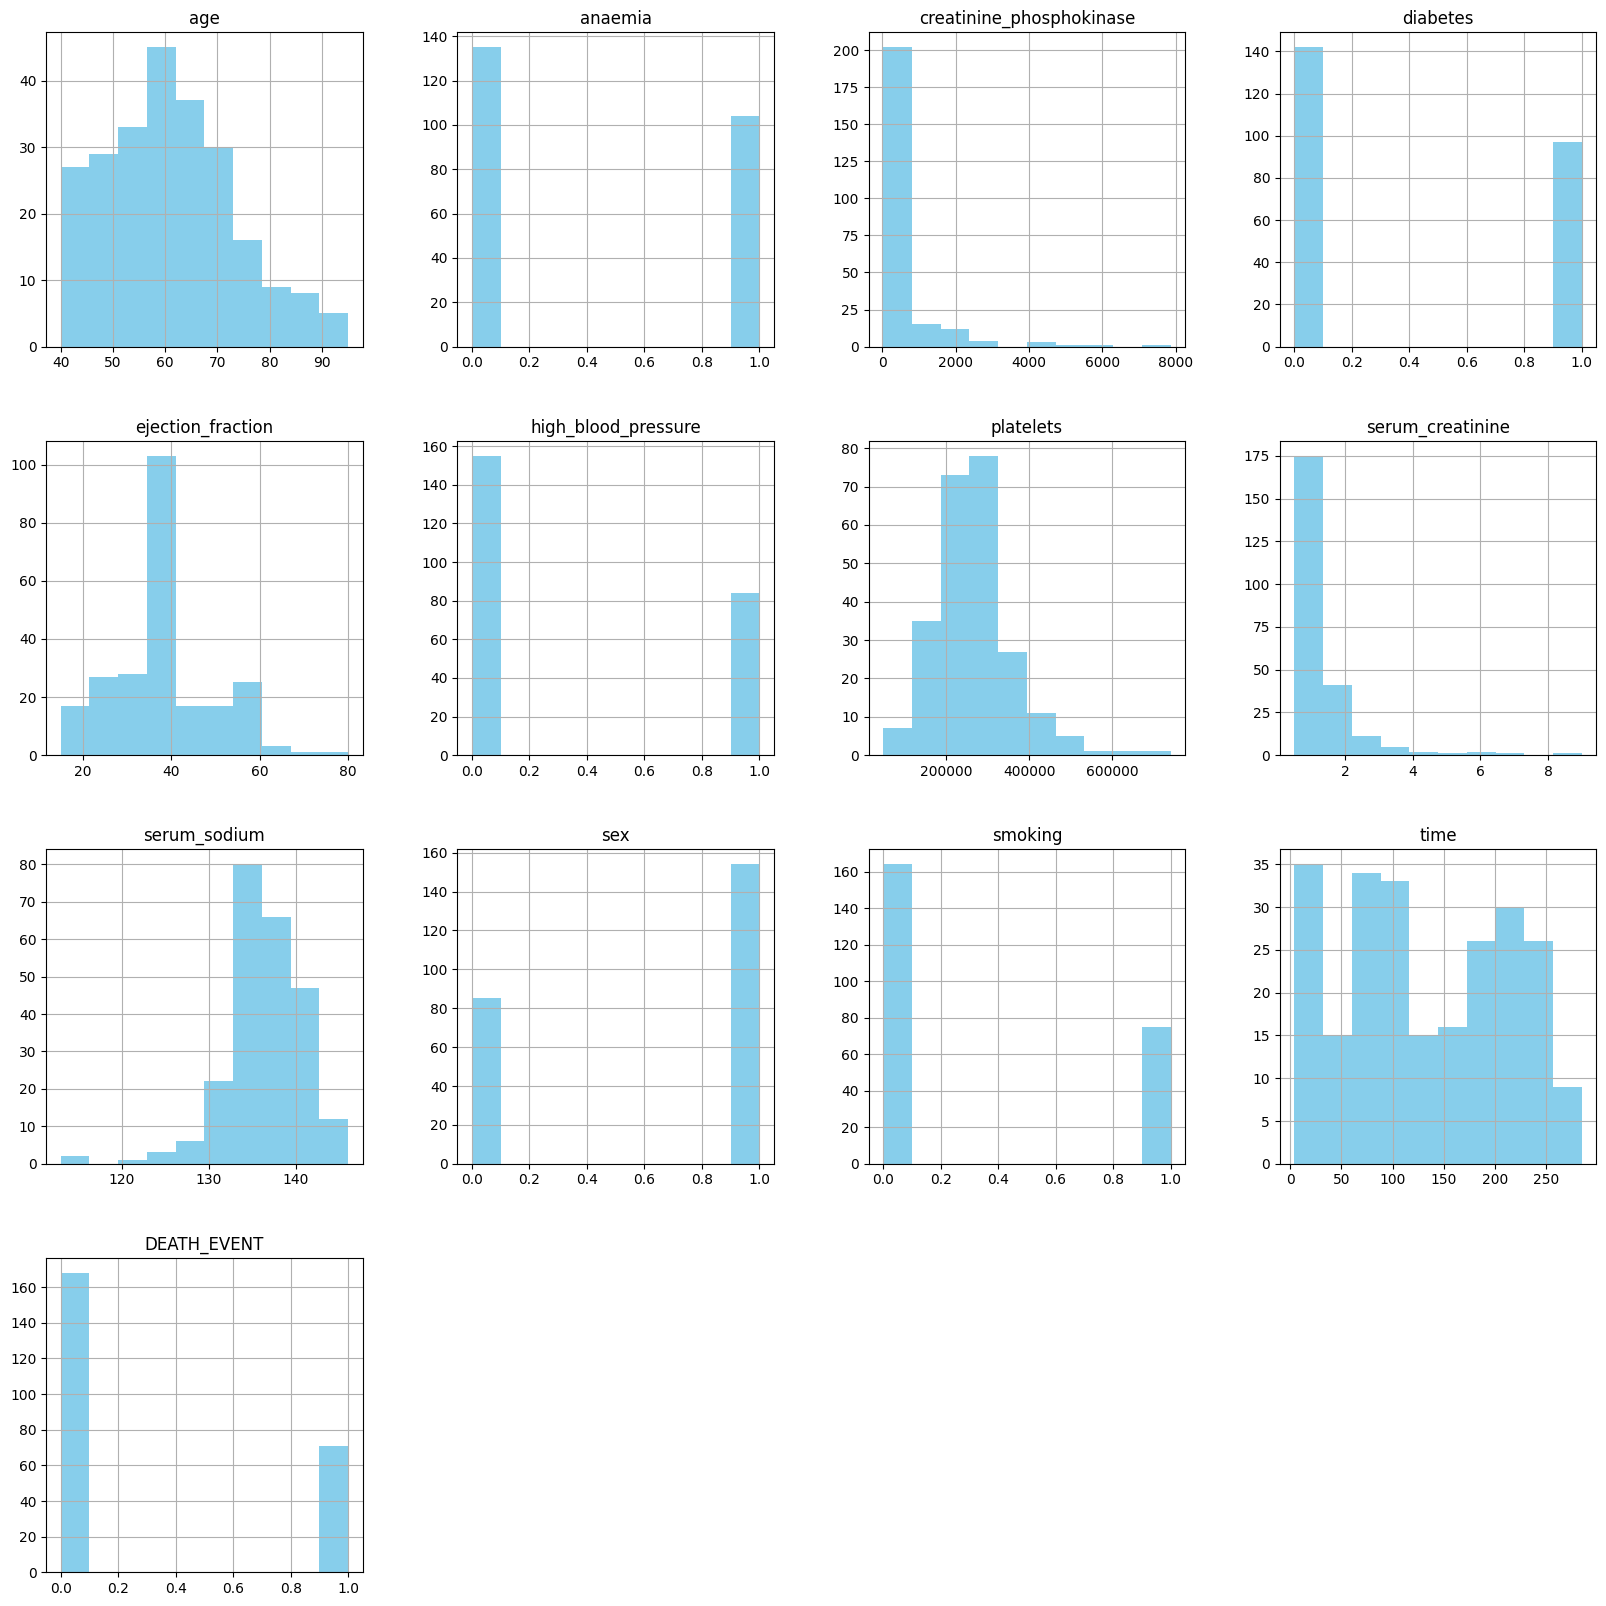

In [ ]:
#Membuat Distribusi Data
train.hist(figsize=(20, 20), bins=10, color='skyblue')
plt.show()

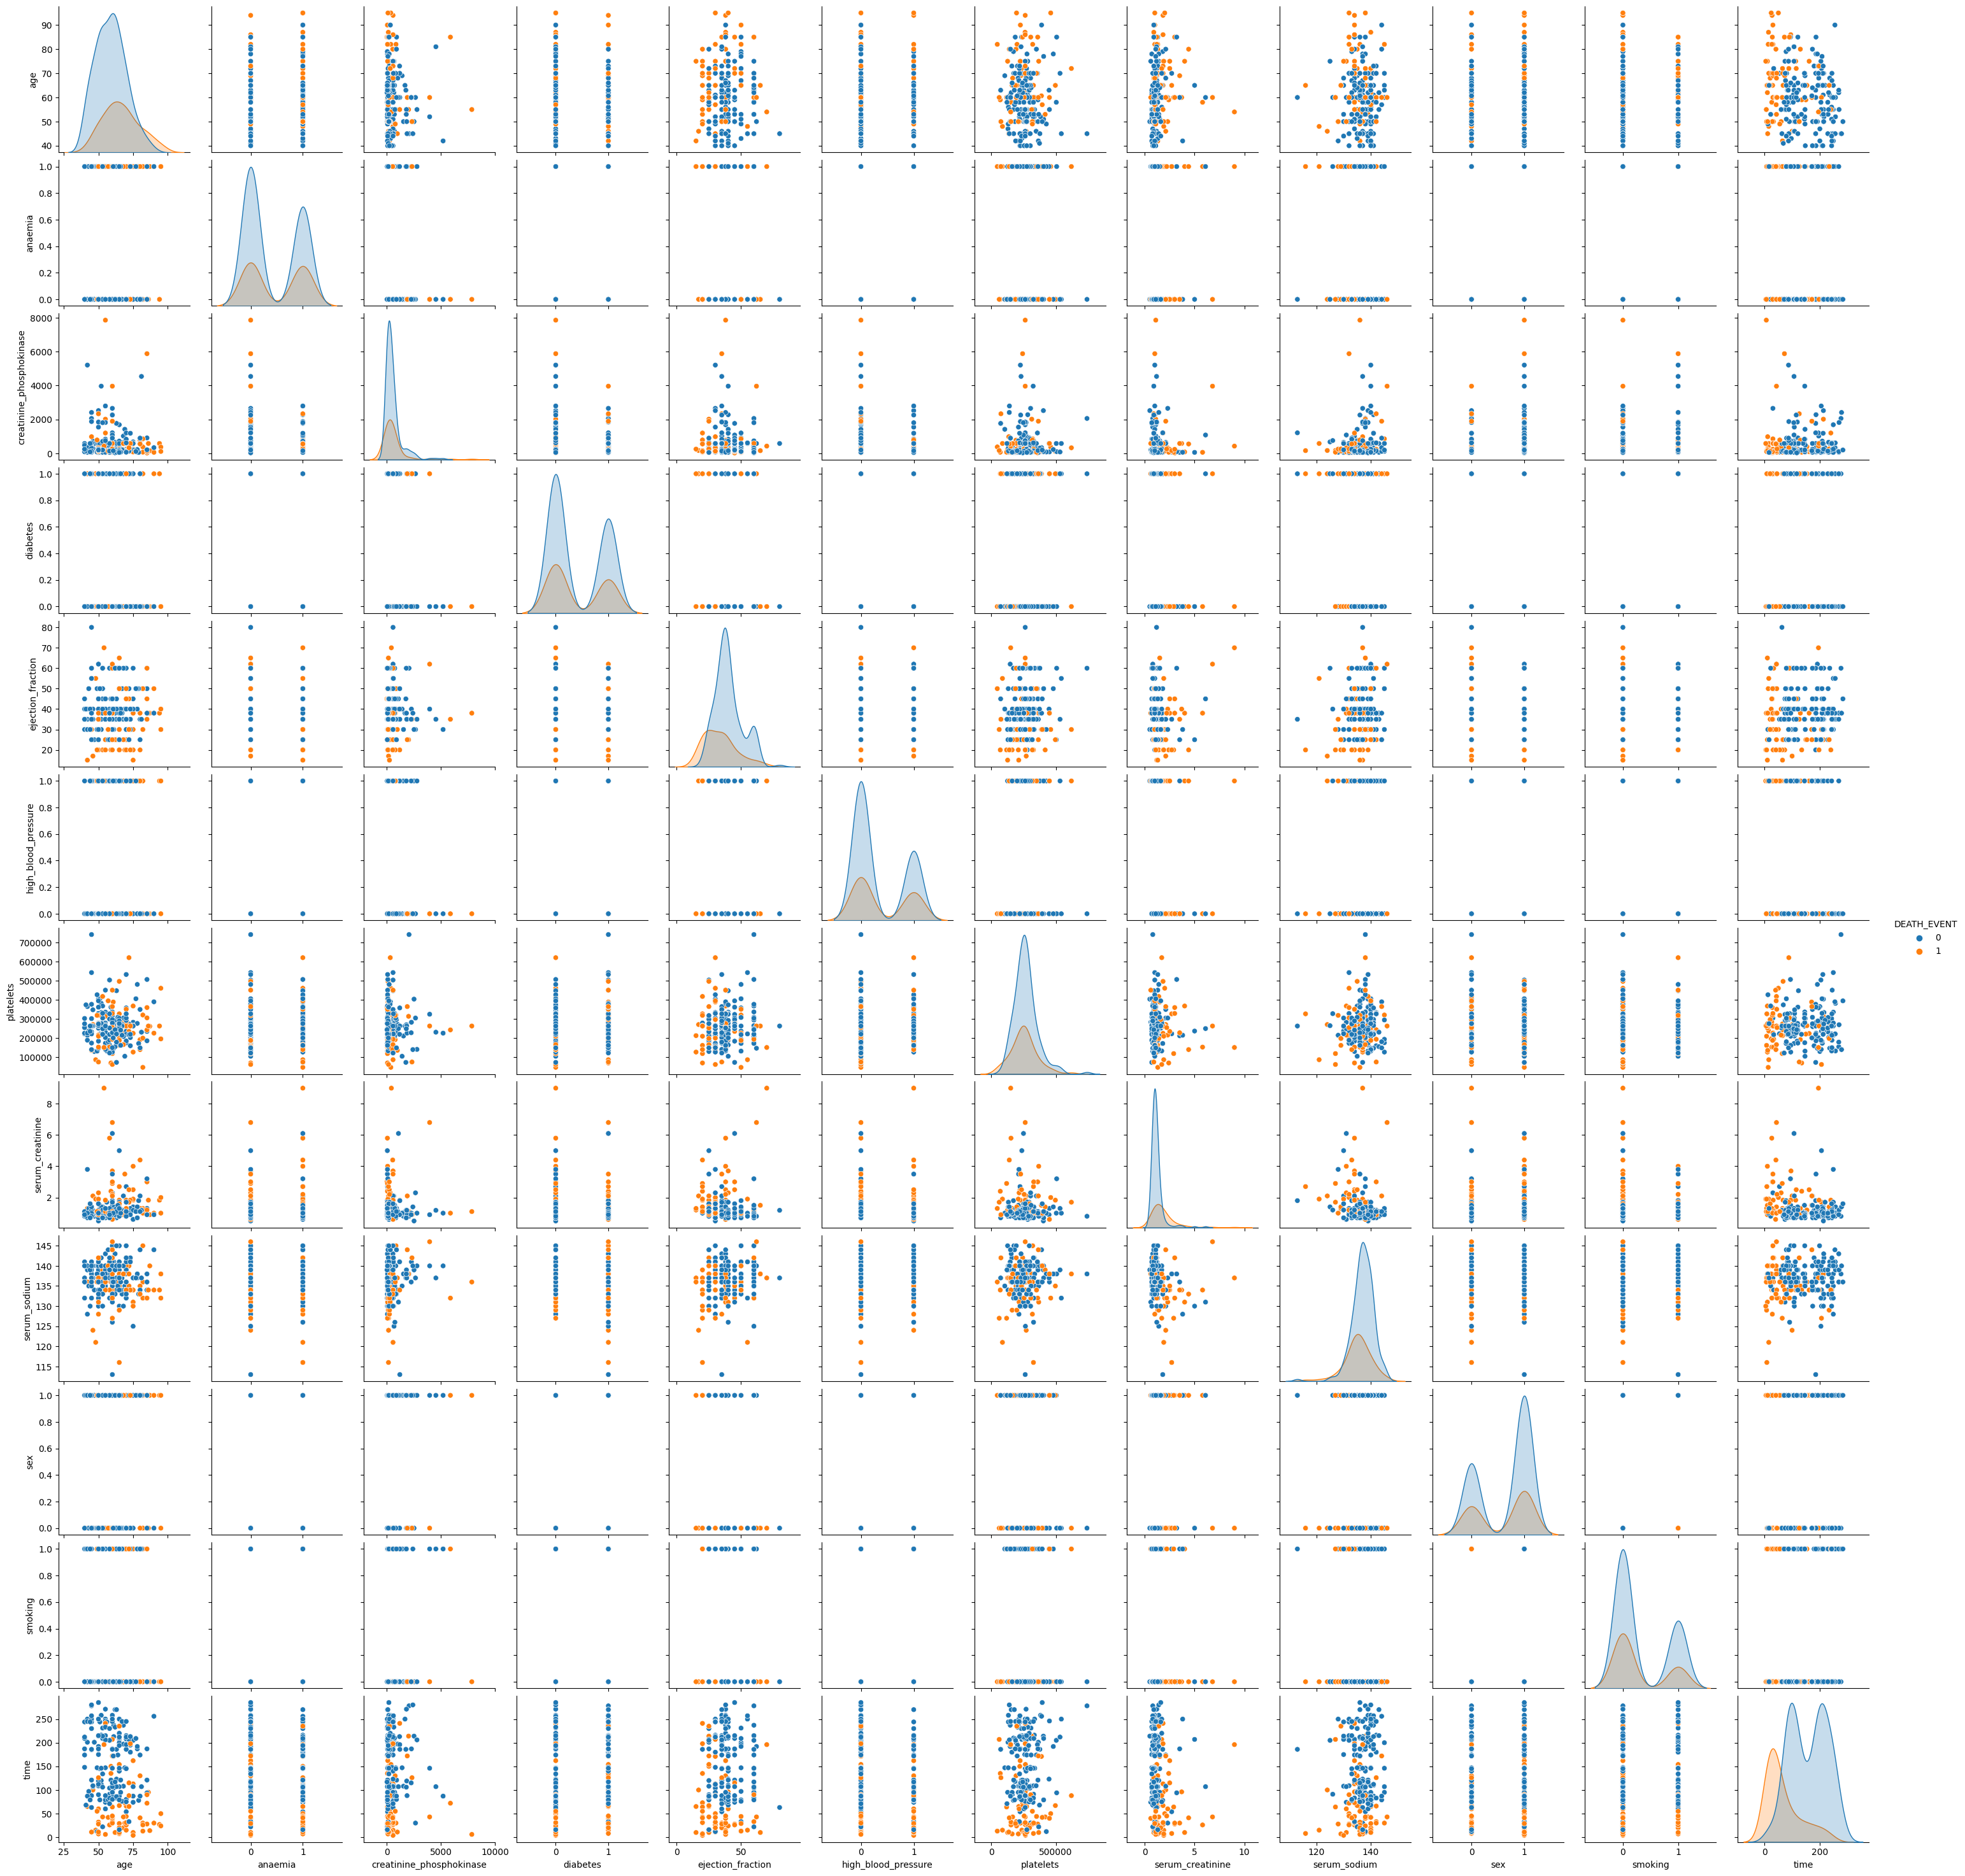

In [ ]:
#Membuat pairplot untuk kerangka data yang lengkap
sns.pairplot(train, hue='DEATH_EVENT')

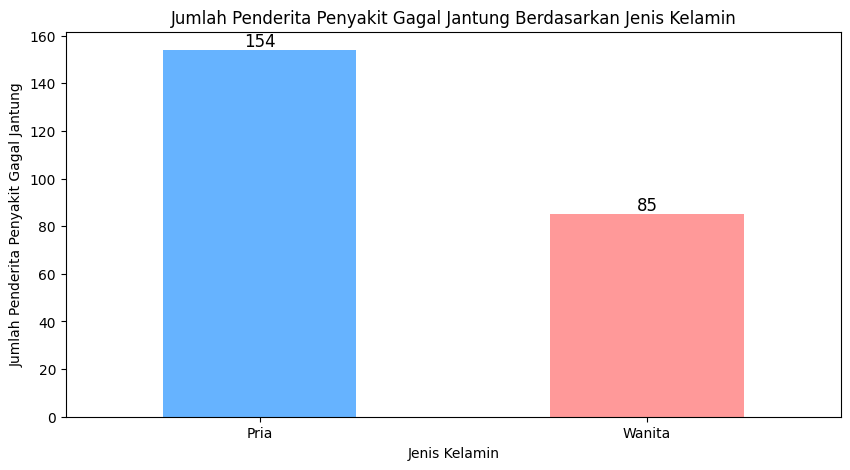

In [ ]:
#Menghitung jumlah penderita penyakit gagal jantung berdasarkan jenis kelamin
gender_counts = train['sex'].value_counts()

#Menampilkan visualisasi jumlah penderita penyakit gagal jantung berdasarkan jenis kelamin
plt.figure(figsize=(10, 5))
gender_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'])
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penderita Penyakit Gagal Jantung')
plt.title('Jumlah Penderita Penyakit Gagal Jantung Berdasarkan Jenis Kelamin')
plt.xticks(range(0, 2), ['Pria', 'Wanita'], rotation=0)
plt.show()

**Insight :**

Jumlah keseluruhan penderita gagal jantung sebanyak 239 orang, yang dimana Pria memiliki jumlah penderita gagal jantung yang lebih tinggi dibandingkan wanita. Penderita gagal jantung berjenis kelamin pria sekitar 154 orang dan penderita gagal jantung berjenis kelamin wanita sekitar 85 orang.

---

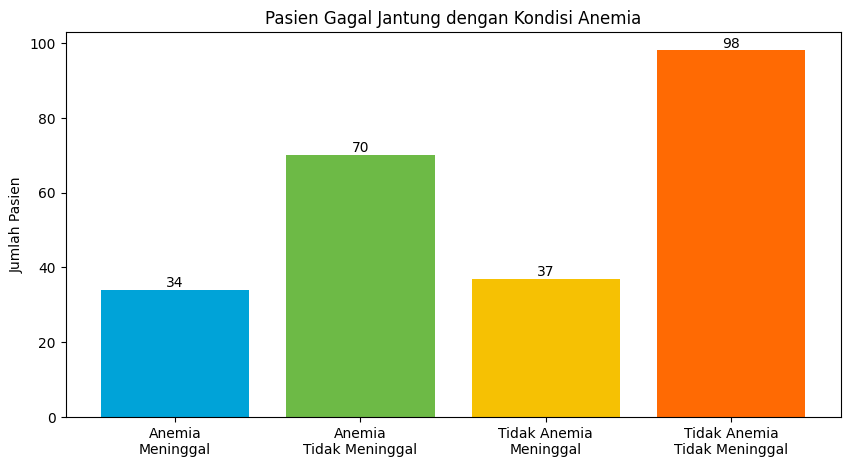

In [ ]:
# Menghitung jumlah pasien untuk setiap kondisi
anaemia_meninggal = train[(train['anaemia'] == 1) & (train['DEATH_EVENT'] == 1)].shape[0]
anaemia_tidak_meninggal = train[(train['anaemia'] == 1) & (train['DEATH_EVENT'] == 0)].shape[0]
tidak_anaemia_meninggal = train[(train['anaemia'] == 0) & (train['DEATH_EVENT'] == 1)].shape[0]
tidak_anaemia_tidak_meninggal = train[(train['anaemia'] == 0) & (train['DEATH_EVENT'] == 0)].shape[0]

# Mengatur label dan nilai untuk sumbu x
labels = ['Anemia\nMeninggal', 'Anemia\nTidak Meninggal', 'Tidak Anemia\nMeninggal', 'Tidak Anemia\nTidak Meninggal']
values = [anaemia_meninggal, anaemia_tidak_meninggal, tidak_anaemia_meninggal, tidak_anaemia_tidak_meninggal]

# Membuat chart batang
plt.figure(figsize=(10, 5))
anaemia = plt.bar(labels, values, color=['#00A3D8', '#6DBA46', '#F6C103', '#FF6A03'])

for bar in anaemia:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Memberi judul dan label sumbu
plt.title('Pasien Gagal Jantung dengan Kondisi Anemia')
plt.ylabel('Jumlah Pasien')
plt.show()

**Insight :**

Pada data diatas terlihat jelas bahwa pasien Gagal Jantung dengan Anemia memiliki jumlah kematian lebih rendah dibandingkan dengan pasien yang tidak mengidap Anemia, dan Pasien Gagal Jantung tanpa Anemia memiliki jumlah yang meninggal lebih tinggi dibandingkan dengan pasien yang mengidap Anemia.

1. Pasien Gagal Jantung yang memiliki riwayat penyakit Anemia, sekitar 70 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 34 orang telah meninggal.

2. Pasien Gagal Jantung yang tidak memiliki riwayat penyakit Anemia, sekitar 98 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 37 orang telah meninggal.

---

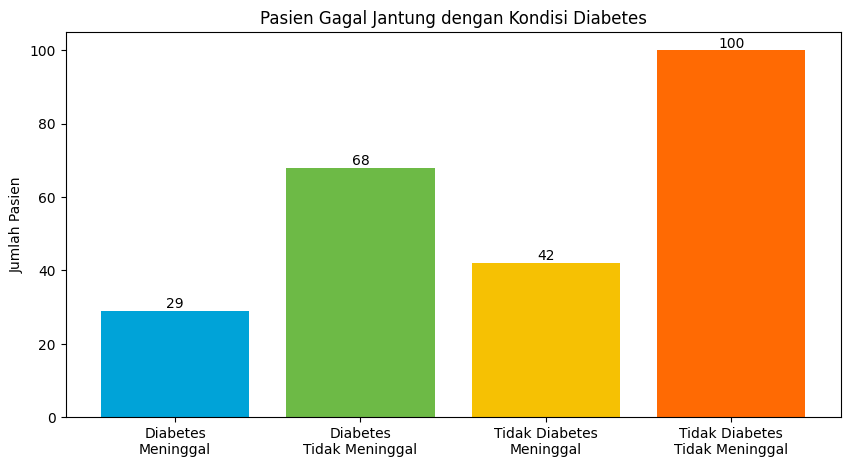

In [ ]:
# Menghitung jumlah pasien untuk setiap kondisi
diabetes_meninggal = train[(train['diabetes'] == 1) & (train['DEATH_EVENT'] == 1)].shape[0]
diabetes_tidak_meninggal = train[(train['diabetes'] == 1) & (train['DEATH_EVENT'] == 0)].shape[0]
tidak_diabetes_meninggal = train[(train['diabetes'] == 0) & (train['DEATH_EVENT'] == 1)].shape[0]
tidak_diabetes_tidak_meninggal = train[(train['diabetes'] == 0) & (train['DEATH_EVENT'] == 0)].shape[0]

# Mengatur label dan nilai untuk sumbu x
labels = ['Diabetes\nMeninggal', 'Diabetes\nTidak Meninggal', 'Tidak Diabetes\nMeninggal', 'Tidak Diabetes\nTidak Meninggal']
values = [diabetes_meninggal, diabetes_tidak_meninggal, tidak_diabetes_meninggal, tidak_diabetes_tidak_meninggal]

# Membuat chart batang
plt.figure(figsize=(10, 5))
diabetes = plt.bar(labels, values, color=['#00A3D8', '#6DBA46', '#F6C103', '#FF6A03'])

for bar in diabetes:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Memberi judul dan label sumbu
plt.title('Pasien Gagal Jantung dengan Kondisi Diabetes')
plt.ylabel('Jumlah Pasien')
plt.show()

**Insight :**

Pada data diatas terlihat jelas bahwa pasien Gagal Jantung dengan Diabetes memiliki jumlah tingkat kematian lebih rendah dibandingkan dengan pasien yang tidak mengidap Diabetes dan pasien Gagal Jantung tanpa Diabetes memiliki jumlah yang meninggal lebih tinggi dibandingkan dengan pasien yang mengidap Diabetes.

1. Pasien Gagal Jantung yang memiliki riwayat penyakit diabetes, sekitar 68 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 29 orang telah meninggal.

2. Pasien Gagal Jantung yang tidak memiliki riwayat penyakit Anemia, sekitar 100 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 42 orang telah meninggal.

---

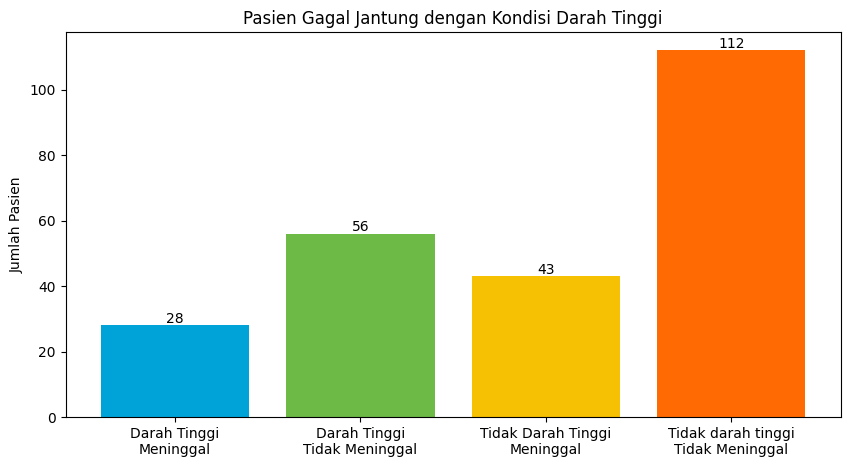

In [ ]:
# Menghitung jumlah pasien untuk setiap kondisi
high_blood_meninggal = train[(train['high_blood_pressure'] == 1) & (train['DEATH_EVENT'] == 1)].shape[0]
high_blood_tidak_meninggal = train[(train['high_blood_pressure'] == 1) & (train['DEATH_EVENT'] == 0)].shape[0]
tidak_high_blood_meninggal = train[(train['high_blood_pressure'] == 0) & (train['DEATH_EVENT'] == 1)].shape[0]
tidak_high_blood_tidak_meninggal = train[(train['high_blood_pressure'] == 0) & (train['DEATH_EVENT'] == 0)].shape[0]

# Mengatur label dan nilai untuk sumbu x
labels = ['Darah Tinggi\nMeninggal', 'Darah Tinggi\nTidak Meninggal', 'Tidak Darah Tinggi\nMeninggal', 'Tidak darah tinggi\nTidak Meninggal']
values = [high_blood_meninggal, high_blood_tidak_meninggal, tidak_high_blood_meninggal, tidak_high_blood_tidak_meninggal]

# Membuat chart batang
plt.figure(figsize=(10, 5))
high_blood = plt.bar(labels, values,  color=['#00A3D8', '#6DBA46', '#F6C103', '#FF6A03'])

for bar in high_blood:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Memberi judul dan label sumbu
plt.title('Pasien Gagal Jantung dengan Kondisi Darah Tinggi')
plt.ylabel('Jumlah Pasien')
plt.show()

**Insight :**

Pada data diatas terlihat jelas bahwa pasien Gagal Jantung dengan Darah Tinggi memiliki jumlah kematian lebih rendah dibandingkan dengan pasien yang tidak mengidap Darah Tinggi, dan Pasien Gagal Jantung tanpa Darah Tinggi memiliki jumlah yang meninggal lebih tinggi dibandingkan dengan pasien yang mengidap Darah Tinggi.

1. Pasien Gagal Jantung yang memiliki riwayat penyakit darah tinggi, sekitar 56 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 28 orang telah meninggal.

2. Pasien Gagal Jantung yang tidak memiliki riwayat penyakit darah tinggi, sekitar 112 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 43 orang telah meninggal.

---

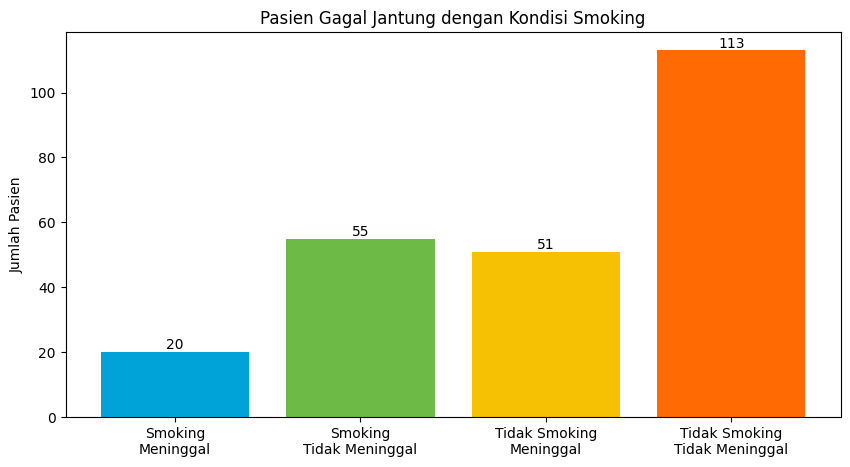

In [ ]:
# Menghitung jumlah pasien untuk setiap kondisi
smoking_meninggal = train[(train['smoking'] == 1) & (train['DEATH_EVENT'] == 1)].shape[0]
smoking_tidak_meninggal = train[(train['smoking'] == 1) & (train['DEATH_EVENT'] == 0)].shape[0]
tidak_smoking_meninggal = train[(train['smoking'] == 0) & (train['DEATH_EVENT'] == 1)].shape[0]
tidak_smoking_tidak_meninggal = train[(train['smoking'] == 0) & (train['DEATH_EVENT'] == 0)].shape[0]

# Mengatur label dan nilai untuk sumbu x
labels = ['Smoking\nMeninggal', 'Smoking\nTidak Meninggal', 'Tidak Smoking\nMeninggal', 'Tidak Smoking\nTidak Meninggal']
values = [smoking_meninggal, smoking_tidak_meninggal, tidak_smoking_meninggal, tidak_smoking_tidak_meninggal]

# Membuat chart batang
plt.figure(figsize=(10, 5))
smoking = plt.bar(labels, values,  color=['#00A3D8', '#6DBA46', '#F6C103', '#FF6A03'])

for bar in smoking:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Memberi judul dan label sumbu
plt.title('Pasien Gagal Jantung dengan Kondisi Smoking')
plt.ylabel('Jumlah Pasien')
plt.show()

**Insight :**

Pada data diatas terlihat jelas bahwa pasien Gagal Jantung dengan Kondisi perokok memiliki jumlah kematian lebih rendah dibandingkan dengan pasien yang tidak perokok, dan pasien Gagal Jantung tidak perokok memiliki jumlah yang meninggal lebih tinggi dibandingkan dengan pasien yang perokok.

1. Pasien Gagal Jantung yang prokok, sekitar 55 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 20 orang telah meninggal.

2. Pasien Gagal Jantung yang tidak perokok, sekitar 113 orang berada dalam fase berjuang untuk penyembuhan gagal jantung, dan 51 orang telah meninggal.

---

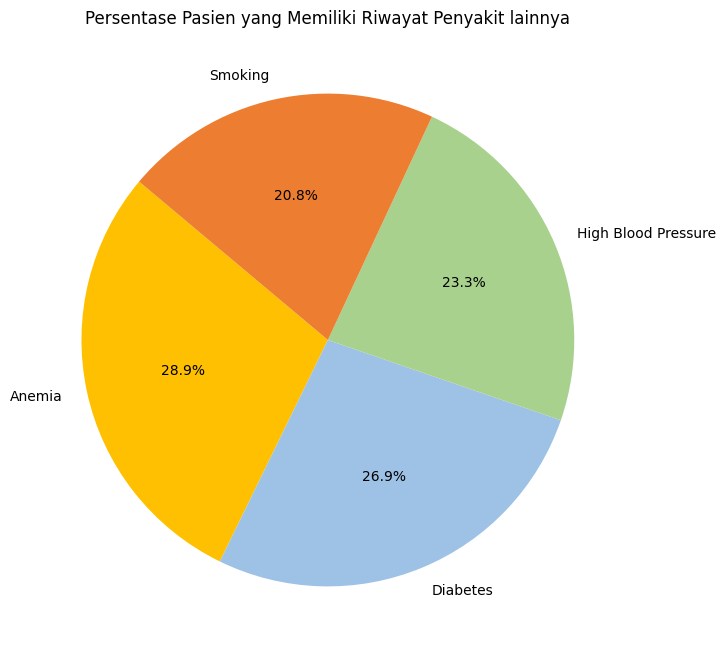

In [ ]:
#Menghitung persentase pasien yang memiliki riwayat anaemia, diabetes, high blood pressure, dan merokok
anemia_count = train[train['anaemia'] == 1]['anaemia'].count()
diabetes_count = train[train['diabetes'] == 1]['diabetes'].count()
high_bp_count = train[train['high_blood_pressure'] == 1]['high_blood_pressure'].count()
smoking_count = train[train['smoking'] == 1]['smoking'].count()

# Menyiapkan data untuk visualisasi pie chart
labels = ['Anemia', 'Diabetes', 'High Blood Pressure', 'Smoking']
sizes = [anemia_count, diabetes_count, high_bp_count, smoking_count]
colors = ['#FFC001', '#9EC2E6', '#A8D18D', '#ED7D31']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Persentase Pasien yang Memiliki Riwayat Penyakit lainnya')
plt.show()

**Insight :**

Dalam analisis penyakit gagal jantung pada dataset ini, ditemukan bahwa anemia merupakan kondisi yang paling umum di antara penderita lainnya, yaitu mencakup sekitar 28.9% dari total kasus. Diurutan kedua, diabetes juga menjadi faktor risiko yang signifikan dengan jumlah penderita sekitar 26.9%. Disusul oleh hipertensi yang terdapat pada 23.3% kasus, dan perokok dengan persentase sebesar 20.8%.

---

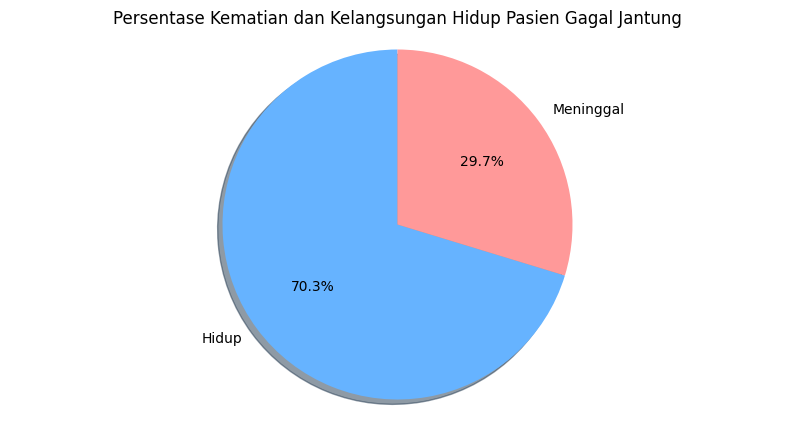

In [ ]:
#menghitung jumlah kematian dan kelangsungan hidup yang terkena gagal jantung
count_alive = train[train['DEATH_EVENT'] == 0]['DEATH_EVENT'].count()
count_death = train[train['DEATH_EVENT'] == 1]['DEATH_EVENT'].count()

# Menampilkan visual dari jumlah kematian dan kelangsungan hidup
labels = ['Hidup', 'Meninggal']
sizes = [count_alive, count_death]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Persentase Kematian dan Kelangsungan Hidup Pasien Gagal Jantung')
plt.axis('equal')
plt.show()

**Insight :**

Dapat dilihat bahwa kelangsungan hidup pada penyakit gagal jantung mencapai 70.3%, sedangkan tingkat kematian mencapai 29.7%. Persentase ini memberikan gambaran mengenai prognosis pasien dengan penyakit gagal jantung dalam dataset ini. Angka kelangsungan hidup yang tinggi menunjukkan adanya kemungkinan keberhasilan dalam pengelolaan atau perawatan penyakit dan dianggap positif karena mengindikasikan bahwa sebagian besar pasien berhasil bertahan hidup dengan penyakit gagal jantung. Namun, tingkat kematian yang signifikan menunjukkan bahwa penyakit gagal jantung tetap menjadi masalah serius yang memerlukan perhatian medis dan upaya pencegahan.

---
### Measure of Central Tendency

In [ ]:
mean_time = train['time'].mean()
median_sodium = train['serum_sodium'].median()
mode_ejection = train['ejection_fraction'].mode()[0]

print(f'Rata-rata waktu observasi: {mean_time:.0f}')
print(f'Median Sodium: {median_sodium}')
print(f'Mode Ejection Fraction: {mode_ejection}')

Rata-rata waktu observasi: 132
Median Sodium: 137.0
Mode Ejection Fraction: 35


**Insight:**

* Rata-rata waktu observasi pada pasien penderita gagal jantung sekitar 132 hari.
* Median dari serum sodiem atau natrium dalam tubuh pasien yaitu 137.0 mEq/L
* Mode Ejection Fraction: 35

---
### Measure of Spread

In [ ]:
#rentang umur pasien
age_range = train['age'].min(), train['age'].max()
print(f'Rentang Usia dalam Dataset: {age_range}')

Rentang Usia dalam Dataset: (40.0, 95.0)


In [ ]:
# Menghitung deviasi standar age
std_dev_age = train['age'].std()
print(f'Standard Deviation of Age: {std_dev_age}')

Standard Deviation of Age: 11.999012931716573


In [ ]:
variability_platelets = train['creatinine_phosphokinase'].std()
print(f"Variabilitas platelets: {variability_platelets}")

Variabilitas platelets: 946.937474811929


**Insight :**

* Rentang usia pasien yang telah divonis gagal jantung yaitu usia 40 hingga 95 tahun.

* Standard Deviation of Age (Deviasi Standar Usia): Nilai deviasi standar usia sekitar 11.99. Ini menunjukkan sejauh mana usia pasien tersebar dari nilai rata-ratanya. Semakin tinggi nilai deviasi standar, semakin besar variasi usia dalam dataset. Nilai yang relatif tinggi ini mungkin menunjukkan variasi usia yang signifikan di antara pasien.


* Variabilitas Platelets (Variabilitas Platelet): Nilai variabilitas platelet sekitar 946.93. Ini mencerminkan seberapa bervariasinya data platelet dalam dataset. Semakin tinggi nilai variabilitas, semakin besar ragam nilai platelet di antara pasien. Nilai yang relatif tinggi mungkin menunjukkan variasi yang signifikan dalam konsentrasi platelet di antara pasien.


---
## Data Preprocessing

### Checking Correlation

In [ ]:
train.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.075484,-0.047069,-0.103526,0.020804,0.069992,0.000475,0.119166,-0.065063,0.063091,-0.032755,-0.246101,0.289363
anaemia,0.075484,1.000000,-0.167715,-0.003595,0.028008,0.060945,-0.045011,0.018905,0.052352,-0.088370,-0.138876,-0.145816,0.057337
creatinine_phosphokinase,-0.047069,-0.167715,1.000000,-0.063066,-0.013758,-0.120585,-0.011842,0.018959,0.079775,0.060299,0.052583,-0.015545,0.035271
diabetes,-0.103526,-0.003595,-0.063066,1.000000,0.008377,-0.037337,0.086682,-0.043117,-0.135737,-0.169129,-0.154961,0.055817,0.003433
ejection_fraction,0.020804,0.028008,-0.013758,0.008377,1.000000,0.049641,0.084689,0.007005,0.170855,-0.119223,-0.078148,0.065829,-0.257293
high_blood_pressure,0.069992,0.060945,-0.120585,-0.037337,0.049641,1.000000,0.030705,-0.039177,0.070915,-0.057220,-0.063454,-0.212515,0.058417
platelets,0.000475,-0.045011,-0.011842,0.086682,0.084689,0.030705,1.000000,-0.069992,0.046123,-0.151702,-0.014396,0.052569,-0.058639
serum_creatinine,0.119166,0.018905,0.018959,-0.043117,0.007005,-0.039177,-0.069992,1.000000,-0.221415,-0.041322,-0.088745,-0.133060,0.326517
serum_sodium,-0.065063,0.052352,0.079775,-0.135737,0.170855,0.070915,0.046123,-0.221415,1.000000,-0.060037,0.013470,0.071817,-0.189510
sex,0.063091,-0.088370,0.060299,-0.169129,-0.119223,-0.057220,-0.151702,-0.041322,-0.060037,1.000000,0.445903,0.001146,-0.052579


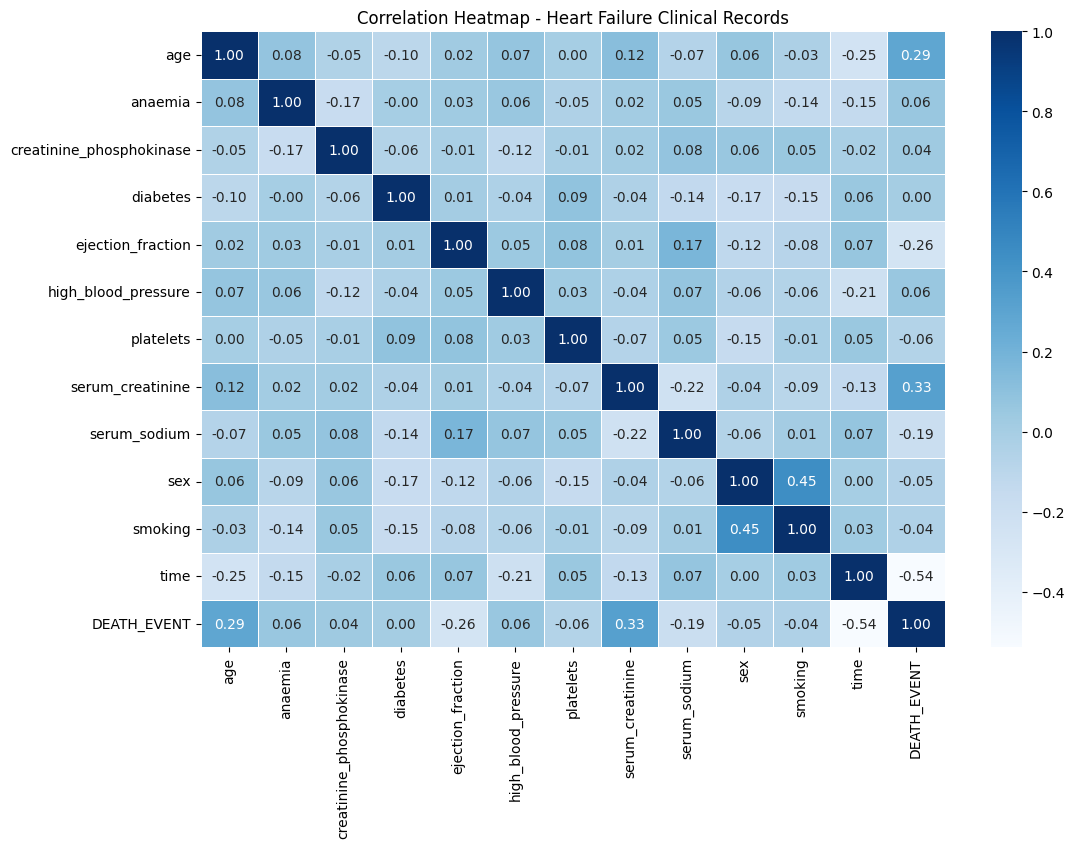

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap - Heart Failure Clinical Records')
plt.show()

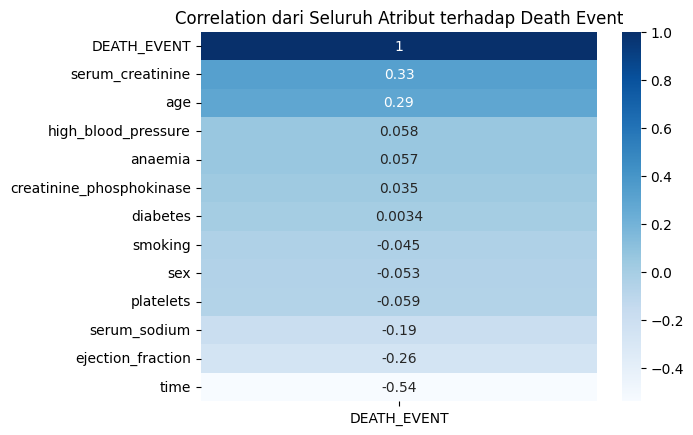

In [ ]:
sns.heatmap(train.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot=True, cmap='Blues')
plt.title('Correlation dari Seluruh Atribut terhadap Death Event')
plt.show()

### Features Selection

In [ ]:
target = 'DEATH_EVENT'
p_values = {}

for column in train:
  contingency_table = pd.crosstab(train[column], train[target])
  chi2, p, dot, expected = chi2_contingency(contingency_table)
  p_values[column] = p

for column, p_value in p_values.items():
  print(f'the p_value for {column}: {p_value:.2f}')

the p_value for age: 0.07
the p_value for anaemia: 0.46
the p_value for creatinine_phosphokinase: 0.39
the p_value for diabetes: 1.00
the p_value for ejection_fraction: 0.00
the p_value for high_blood_pressure: 0.45
the p_value for platelets: 0.63
the p_value for serum_creatinine: 0.00
the p_value for serum_sodium: 0.01
the p_value for sex: 0.51
the p_value for smoking: 0.59
the p_value for time: 0.00
the p_value for DEATH_EVENT: 0.00


Berdasarkan hasil uji chi-squre, kita dapat menyimpulkan bahwa kolom-kolom dengan nilai p-value kurang dari 0.05 adalah yang memiliki korelasi signifikan terhadap 'DEATH_EVENT', maka atribut yang tidak memiliki korelasi yang signifikan perlu di hapus guna menghasilkan accuracy yang baik.

In [ ]:
train = train.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)
test = test.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)

In [ ]:
train.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
6,75.000,15,1.20,137,10,1
183,75.000,38,2.50,134,162,1
185,60.667,30,1.50,136,171,1
146,52.000,30,0.70,136,112,0
30,94.000,38,1.83,134,27,1


In [ ]:
X_train = train.drop('DEATH_EVENT', axis=1)
y_train = train['DEATH_EVENT']

X_test = test.drop('DEATH_EVENT', axis=1)
y_test = test['DEATH_EVENT']

### Scaling Data Numeric

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Handling Oversampling

In [ ]:
#Menggunakan smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

Counter({1: 168, 0: 168})



---
## Data Modelling

### Model eXtreme Gradient Boosting

XGBoost (eXtreme Gradient Boosting) merupakan model gradient boosting yang sangat polpuler dan kuat. Model ini membangun serangkaian pohon keputusan secara bertahap, dengan setiap pohon berusaha memperbaiki kesalahan prediksi model sebelumnya, serta model XGBoost memiliki kinerja yang tinggi dan keampuannya dalam menangani data yang kompleks sehingga dapat menghasilkan prediksi yang akurat dan efisien.

In [ ]:
#xgboost
xtreme = XGBClassifier()
xtreme.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xtreme = xtreme.predict(X_test)
accuracy_xtreme = accuracy_score(y_test, pred_xtreme)
print(f'Akurasi XGBoost: {accuracy_xtreme}')

Akurasi XGBoost: 0.8166666666666667


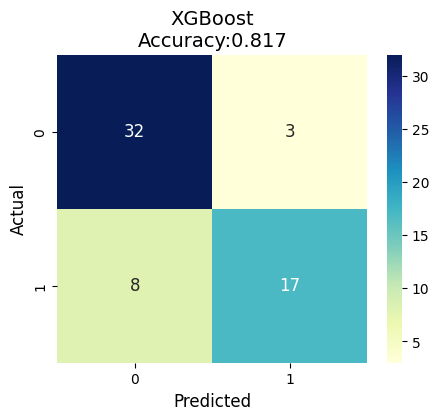

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.85      0.68      0.76        25

    accuracy                           0.82        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.82      0.81        60



In [ ]:
#Confussion XGBoost
xtreme_cm = confusion_matrix(y_test, pred_xtreme)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(xtreme_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'XGBoost\nAccuracy:{accuracy_xtreme:.3f}'.format(accuracy_score(y_test, pred_xtreme)), fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_xtreme))

### Model Random Forest Classifier

Random Forest Classifier adalah model ensamble yang terdiri dari banyak pohon keputusan. Setiap pohon dibangun secara acak, dan prediksi akhir diambil dengan cara agregasi hasil prediksi dari semua pohon. Random Forest memiliki karakteristik yang kuat, memiliki kemampuan dalam menangani berbagai jenis data, tahan overfitting, dan dapat digunakan baik untuk klasifikasi maupun regresi.

In [ ]:
#random forest
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred_randforest = randforest.predict(X_test)
accuracy_randforest = accuracy_score(y_test, pred_randforest)
print(f'Akurasi Random Forest: {accuracy_randforest}')

Akurasi Random Forest: 0.7833333333333333


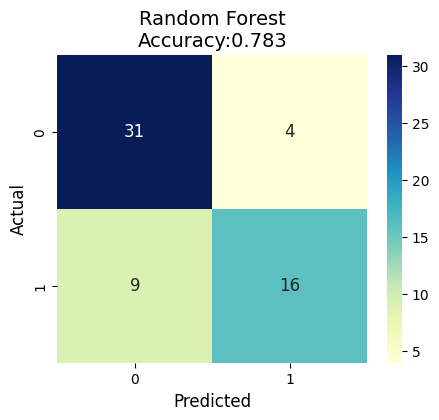

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.80      0.64      0.71        25

    accuracy                           0.78        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.79      0.78      0.78        60



In [ ]:
#Confussion Random Forest
randforest_cm = confusion_matrix(y_test, pred_randforest)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(randforest_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'Random Forest\nAccuracy:{accuracy_randforest:.3f}', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_randforest))

### Model Bagging Classifier

Bagging (Bootstrap Aggregating) melibatkan pelatihan beberapa model dengan menggunakan subset acak dari data pelatihan. model bagging dengan pohon keputusan merupakan bagian dari model ensamble yang kuat dan tahan terhadap overfitting.

In [ ]:
dectree = DecisionTreeClassifier()
bagging = BaggingClassifier(dectree, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, pred_bagging)
print(f'Accuracy: {accuracy_bagging}')

Accuracy: 0.6666666666666666


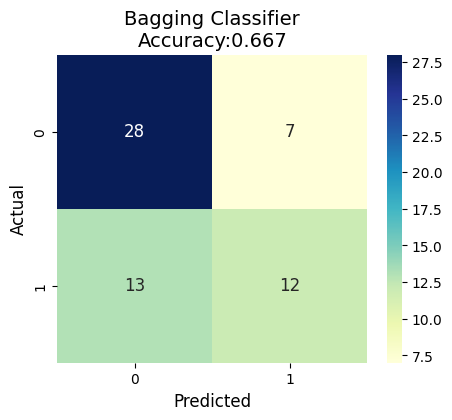

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.63      0.48      0.55        25

    accuracy                           0.67        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.66      0.67      0.66        60



In [ ]:
#Confussion Bagging
bagging_cm = confusion_matrix(y_test, pred_bagging)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(bagging_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'Bagging Classifier\nAccuracy:{accuracy_bagging:.3f}', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_bagging))

### Model Adaptive Boost Classifier

Adaptive Boosting (AdaBoost) adalah ensamble yang memberi bobot lebih pada instance yang sulit dikenali oleh model sebelumnya. Ini memadukan model-model berbasis lemah untuk membuat model yang kuat. AdaBoost digunakan karena kemampuannya dapat menangani klasifikasi biner dan multi-kelas.

In [ ]:
adaptive = AdaBoostClassifier(n_estimators=50, random_state=42)
adaptive.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
pred_adaptive = adaptive.predict(X_test)
accuracy_adaptive = accuracy_score(y_test, pred_adaptive)
print(f'AdaBoost Accuracy: {accuracy_adaptive}')

AdaBoost Accuracy: 0.7666666666666667


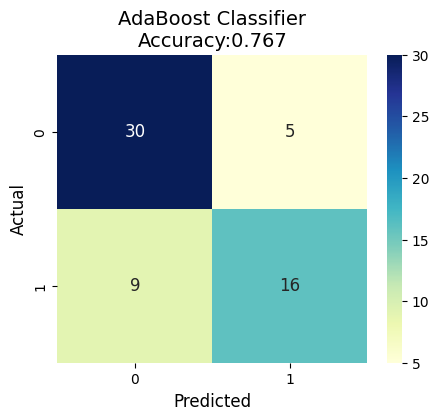

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.76      0.64      0.70        25

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60



In [ ]:
#Confussion AdaBoost Classifier
adaptive_cm = confusion_matrix(y_test, pred_adaptive)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(adaptive_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'AdaBoost Classifier\nAccuracy:{accuracy_adaptive:.3f}', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_adaptive))

### Model Logistic Regression

Logistic Regression kami gunakan sebagai pembanding dari model sebelumnya yang berbasis pohon, dikarenakan model Logistic Regression adalah model yang sederhana dan mudah diinterpretasi, dengan koefisien yang memberikan informasi langsung tentang seberapa kuat pengaruh setiap fitur terhadap output, Logistic Regression efektif pada data yang bersifat linear, serta jika hubungan antara fitur dan target cenderung bersifat linier, Logistic Regression dapat memberikan kinerja yang baik tanpa kompleksitas tambahan.


In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_logistic = logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, pred_logistic)
print(accuracy_logistic)

0.7833333333333333


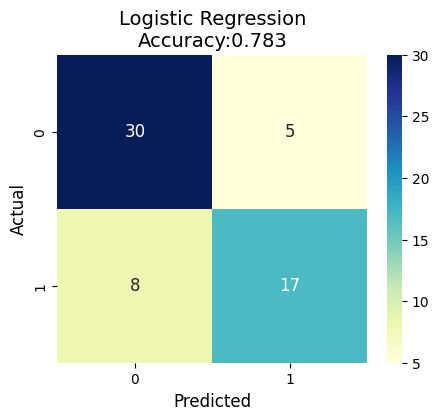

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.77      0.68      0.72        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
#Confussion AdaBoost Classifier
logistic_cm = confusion_matrix(y_test, pred_logistic)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(logistic_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'Logistic Regression\nAccuracy:{accuracy_logistic:.3f}', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_logistic))

### Model Support Vector Machine

Support Vector Machine (SVM) kami gunakan sebagai pembanding untuk model berbasis pohon, dikarenakan model SVM adalah model yang kuat dan serbaguna yang dapat menangani baik data linear maupun non-linear. SVM dapat membangun batas keputusan yang kompleks dan lebih mampu menangani hubungan non-linear dalam data. Selain itu, SVM memiliki kemampuan untuk menangani data yang memiliki dimensi tinggi dan sensitif terhadap outlier.

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
print(accuracy_svm)

0.7666666666666667


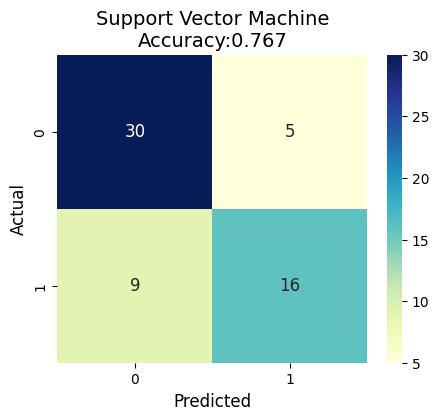

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.76      0.64      0.70        25

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60



In [ ]:
#Confussion AdaBoost Classifier
svm_cm = confusion_matrix(y_test, pred_svm)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(svm_cm, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'fontsize':12})
plt.title(f'Support Vector Machine\nAccuracy:{accuracy_svm:.3f}', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Menampilkan Classification Report
print('Classification Report:\n', classification_report(y_test, pred_svm))

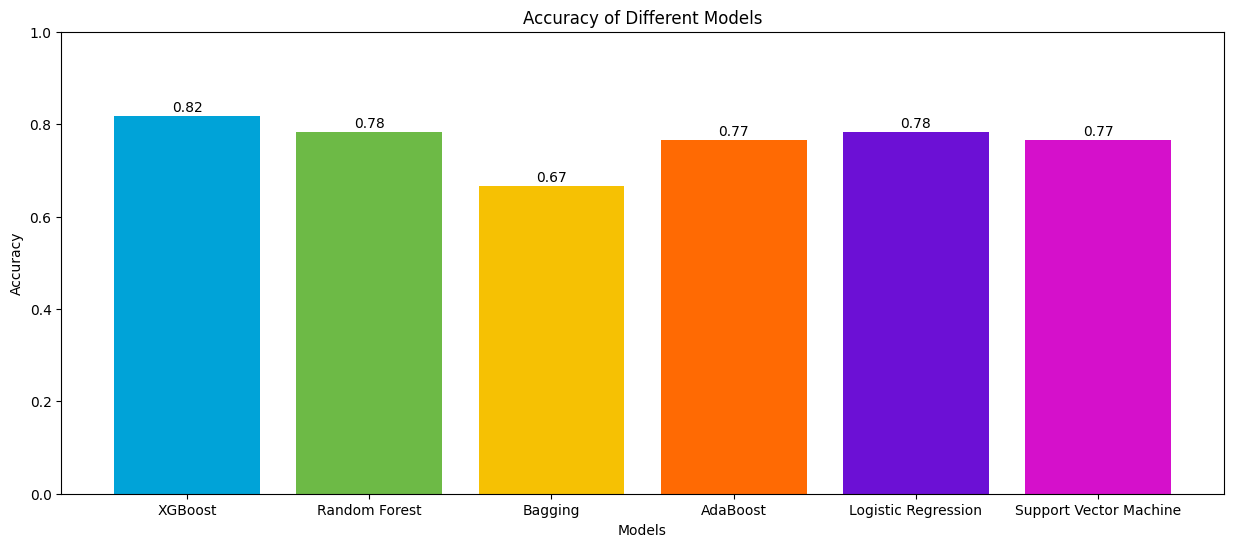

In [ ]:
accuracies = [accuracy_xtreme, accuracy_randforest, accuracy_bagging, accuracy_adaptive, accuracy_logistic, accuracy_svm]
models = ['XGBoost', 'Random Forest', 'Bagging', 'AdaBoost', 'Logistic Regression', 'Support Vector Machine']

# Buat bar plot
plt.figure(figsize=(15, 6))
plt.bar(models, accuracies, color=['#00A3D8', '#6DBA46', '#F6C103', '#FF6A03', '#6C10D5', '#D510CB'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])  # Sesuaikan batas y-axis sesuai dengan range akurasi (0-1)

# Tambahkan label pada setiap bar
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

# Tampilkan plot
plt.show()

## Model Inference

In [ ]:
print('INFERENCE MENGGUNAKAN MODEL ALGORITMA XGBoost')
age = float(input('Usia: '))
ejection_fraction = float(input('Fraksi Ejeksi: '))
serum_creatinine = float(input('Kadar serum creatinine: '))
serum_sodium = float(input('Kadar serum sodium: '))
Time = float(input('Lama tindak lanjut: '))

# Membuat array input untuk model
user_input = [[age, ejection_fraction, serum_creatinine, serum_sodium, Time]]

# Melakukan prediksi menggunakan model yang sudah dilatih
result = xtreme.predict(user_input)

# Menampilkan hasil prediksi
if result[0] == 1:
    print('\nPrediksi bernilai 1, maka Pasien berisiko meninggal')
elif result[0] == 0:
    print('\nPrediksi bernilai 0, maka pasien tidak berisiko meninggal (SELAMAT)')
else:
    print('\nPrediksi tidak valid')

INFERENCE MENGGUNAKAN MODEL ALGORITMA XGBoost
Usia: 68
Fraksi Ejeksi: 20
Kadar serum creatinine: 2.5
Kadar serum sodium: 125
Lama tindak lanjut: 132

Prediksi bernilai 0, maka pasien tidak berisiko meninggal (SELAMAT)


---
---
## **CONCLUSION**

Dari hasil pelatihan pada berbagai model algoritma menggunakan ensemble berbasis pohon dan model logistic regression serta model support vector machine sebagai model pembanding dari model algoritma ensemble.

- Pada model **XGBoost** memberikan hasil yang unggul dengan tingkat akurasi tinggi dan keseimbangan antara precision dan recall untuk kedua kelas. hal ini mencerminkan bahwa kemampuan model dalam melakukan klasifikasi dengan baik tanpa mengorbankan performa pada satu kelas tertentu.
- Pada Model **Random Forest** memiliki performa yang baik terhadap kelas 0, namun memiliki sedikit kesulitan dalam mengidentifikasi kelas 1. Meskipun akurasinya tinggi, keseimbangan antara precision dan recall perlu diperhatikan kembali.
- Pada Model **Bagging** menunjukkan performa yang cukup baik, tetapi hasilnya lebih rendah dibandingkan model lainnya.
- Pada Model **AdaBoost Classifier** memiliki performa yang baik terhadap kedua kelas, Meskipun akurasinya cukup tinggi, keseimbangan antara recall dan f1-score perlu diperhatikan kembali.
- Pada model pembanding, kedua model memiliki performa yang baik, pada model **Logistic Regression** sangat disayangkan karena model ini kurang mampu menangani kompleksitas data sedangkan model **Support Vector Machine (SVM)** kurang optimal dan memerlukan penyesuaian lebih lanjut untuk meningkatkan akurasi serta keseimbangan antara recall dan f1-score.

Dan terihat jelas bahwa model XGBoost memiliki hasil terbaik dengan akurasi sebesar 82%. Model ini juga memiliki nilai F1-score yang tinggi, yaitu 0.85 untuk kelas 0 dan 0.76 untuk kelas 1, serta menunjukkan keseimbangan antara precision dan recall yang baik.

---
---